# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [8]:
medical.shape

(1338, 8)

In [9]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

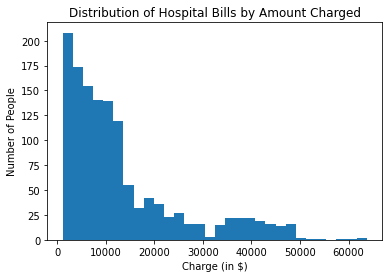

In [13]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('Charge (in $)')
_ = plt.ylabel('Number of People')
_ = plt.title('Distribution of Hospital Bills by Amount Charged')

In [14]:
hos_mean = np.mean(medical['charges'])
#As this is assumed to be from sampling, I will have to take into account Bessel's Correction
hos_std = np.std(medical['charges'], ddof=1)
#I also want to see the median to better support my claims of the appropriateness of the data
hos_median = np.median(medical['charges'])
print('Mean:', hos_mean)
print('STD:', hos_std)
print('Median:', hos_median)

Mean: 13270.422265141257
STD: 12110.011236693994
Median: 9382.033


So, by the looks of it, I don't think that the mean and standard deviation are appropriate for defining the data as of right now, as there seems to be a handful of outliers that are skewing those parameters to be very high.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

I think the way that you could justify the data to give a concrete answer to the question of if the hospital has fallen below the average needed to continue operation would be if the 12000 dollar mark was in the confidience interval of the expected population mean. So the best test I can think of to apply to test this out would be a confidence interval test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

I think that the proper test to run would be a one-sided confidence interval test, as the hospital would not necessarily care if they are averaging more money than what they previously thought, but if they are making less then problems would start to arise.

In [58]:
df = len(medical['charges']) - 1
print(df)

1337


In [54]:
ppf95 = t.ppf(0.95, df=df)
ppf99 = t.ppf(0.99, df=df)
print(ppf95)
print(ppf99)

1.6459941145571317
2.3291402121487095


In [51]:
hold_v = hos_std / np.sqrt(len(medical['charges']))

In [55]:
mci_95 = hos_mean - ppf95 * hold_v
mci_99 = hos_mean - ppf99 * hold_v
print(mci_95)
print(mci_99)

12725.48718381623
12499.319744360895


In [53]:
#For a reminder of the sample mean
print(hos_mean)
#So, we can observe that the average price is well above the break even threshold of 12000 dollars even when looking at a 
#99% confidience interval, meaning that the worry of the average falling too low is unfounded.

13270.422265141257


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

I assume that the assumptions made about the variances of the two groups that are being made is in the guesses made about the value of the population mean and population standard deviation, as while we can get a good estimate of where it could be, we do not know what it actually is, and thus we make an assumption to move forward. 

Null hypothesis: People who have insurance are charged similarly to those who do not have insurance.

Alternate hypothesis: People who have insurance are charged at different (lower or higher) rates than those who do not have insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [63]:
#First I need to seperate into the two groups (with and without insurance). As I only care about the charges after I 
#seperate them out, I will put the values into a list for more ease when doing later calculations
igroup0 = []
igroup1 = []
for n in range(len(medical['charges'])):
    if medical['insuranceclaim'][n] == 0:
        igroup0.append(medical['charges'][n])
    elif medical['insuranceclaim'][n] == 1:
        igroup1.append(medical['charges'][n])
    else:
        print('Error at:', n)

In [74]:
g0mean = np.mean(igroup0)
g1mean = np.mean(igroup1)

g0std = np.std(igroup0)
g1std = np.std(igroup1)

psd = np.sqrt((((len(igroup0) - 1) * (g0std ** 2)) + ((len(igroup1) - 1) * (g1std ** 2))) / (len(igroup0) + len(igroup1) -2))
print(psd)

11512.282899205748


In [84]:
myt = (g0mean - g1mean) / (psd * np.sqrt((1 / len(igroup0)) + (1 / len(igroup1))))
print(myt)

-11.901306943555388


In [79]:
#Didn't run the import for whole scipy.stats, instead just for t, so I will do that now
from scipy import stats

In [82]:
stats.ttest_ind(igroup0, igroup1)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

I really don't get this question. I guess I have to say that they probably have things set up like this for if you want to try and estimate a z score from a sample (even though you are not supposed to do that) as a means of getting a good estimate of the z score. I assume this is because the ways to get close to an accurate z score despite not knowing the full population exist, and I am just not aware of it. I will say that I think this question is poorly worded, as I am still unsure as to how to answer this question, but hey, I guess I was unable to get my t score to what scipy said it should be (don't know why but it is).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test